# LGBIO2060 Exercice session 3

#Bayesian inference of a continuous hidden state 

__Authors:__ Simon Vandergooten, Clémence Vandamme, Florence Blondiaux & Antoine De Comité

__Content inspired from__: Neuromatch Academy github.com/NeuromatchAcademy


##Introduction and context

In this tutorial, we will extend the Bayes' theorem introduced last week to continuous hidden state. 

In the first part, we will describe how to compute a posterior from continuous distributions. Then, we will apply this to a real life example. 



In [1]:
# @title Import libraries
import numpy as np
import matplotlib.pyplot as plt

##Mathematical formalism

Along this tutorial, we will again be using Bayes' theorem. As a reminder, this theorem combines two sources of information into an optimal one. It combines the *likelihood*, which is a distribution that quantifies how likely the measurement is, given the real latent state; and the *prior* which quantifies the knowledge we have about the system, thanks to our prior experience. Bayes' rule defines the *posterior* distribution in the following manner: 

\begin{eqnarray}
\text{Posterior} = \dfrac{ \text{Likelihood} \times \text{Prior}}{ \text{Normalization constant}} \tag{1}
\end{eqnarray}

We consider now continuous distributions. When both the prior and likelihood are gaussian distributions, the posterior will be a gaussian distribution as well.

In fact, the mean of the posterior distribution is simply a weighted average of the means of the prior and of the likelihood. The weight is determined by the confidence associated with each source of information. 
If one source of information is very noisy (of high variance), we will not have high confidence in it and grant it less weight. 

$$
\mu_{3} = a\mu_{1} + (1-a)\mu_{2} \tag{2}
$$
$$
a = \frac{\sigma_{1}^{-2}}{\sigma_{1}^{-2} + \sigma_{2}^{-2}} \tag{3}
$$

Since we are combining two sources of information, we are **gaining** information. The amount of information carried by a gaussian is the inverse of the variance. Therefore, the information of the posterior is equal to the sum of the information of prior and the likelihood. Then, we have: 

$$\sigma_{3}^{-2} = \sigma_{1}^{-2} + \sigma_{2}^{-2} \tag{4}$$

Therefore: 

$$
\begin{array}{rcl}
\text{Posterior} &\propto& \mathcal{N}(\mu_{\text{likelihood}},\sigma_{\text{likelihood}}^2) \times \mathcal{N}(\mu_{\text{prior}},\sigma_{\text{prior}}^2) \\
&= & \mathcal{N}\left( \dfrac{\sigma^2_{\text{likelihood}}\mu_{\text{prior}}+\sigma^2_{\text{prior}}\mu_{\text{likelihood}}}{\sigma^2_{\text{likelihood}}+\sigma^2_{\text{prior}}}, \dfrac{\sigma^2_{\text{likelihood}}\sigma^2_{\text{prior}}}{\sigma^2_{\text{likelihood}}+\sigma^2_{\text{prior}}} \right) 
\end{array} \tag{5}
$$
 

### Exercise 1A: Finding the posterior computationally

Implement the Bayes' theorem to compute the posterior probability distribution as a function of the prior and the likelihood

Hints: 

* You can use the function `my_gaussian(x, mean, scale)` that you implementend in tutorial 1 to generate likelihood ($\mu$=3, $\sigma$=1.5) and prior ($\mu=-1$ and $\sigma$ =1.5). This function is provided for you in this notebook.
* Compute the posterior **using pointwise multiplication** of the likelihood and prior. Don't forget to normalize so the posterior adds up to 1.





In [2]:
# @markdown Execute this cell to enable the function `my_gaussian`
def my_gaussian(x_vector,mu,sigma):
    """
  Author: Antoine de Comite 
  This function computes the gaussian distribution characterised by mu & sigma on the set x_vector
  
  Inputs : x_vector (numpy array) the set over which you want to compute the gaussian distribution
           mu (double) mean value of the gaussian distribution
           sigma (double) standard deviation of the gaussian distribution
  Outputs: px (numpy array) is the gaussian distribution evaluated over x_vector
  """
    px = np.exp(- 1/2/sigma**2 * (mu - x_vector) ** 2)
    px = px / sum(px)
    return px

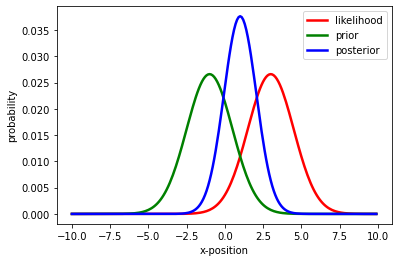

In [3]:
x_vector = np.arange(-10,10,0.1)
likelihood = my_gaussian(x_vector, 3, 1.5)
prior = my_gaussian(x_vector, -1, 1.5)
def compute_posterior_pointwise(prior, likelihood):
    '''
    Returns the normalized posterior probability based on the prior and the likelihood
    Prior: The prior probabilities
    Likelihood: The likelihood probabilities
    '''
    ##########################
    ##### Your code here #####
    ##########################
    posterior = likelihood * prior
    posterior /= sum(posterior)

    return posterior

posterior = compute_posterior_pointwise(prior, likelihood)
# Run the lines below to test your code
fig, ax = plt.subplots()
ax.plot(x_vector,likelihood,'r',Linewidth=2.5,label='likelihood')
ax.plot(x_vector,prior,'g',Linewidth=2.5,label='prior')
ax.plot(x_vector,posterior,'b',Linewidth=2.5,label='posterior')
ax.set_xlabel('x-position')
ax.set_ylabel('probability')
ax.legend()



*Example output:*

<img alt='Solution hint' align='left' width=413 height=300 src=https://raw.githubusercontent.com/svandergoote/LGBIO2060-2022/master/Solutions/TP3_sol1.png>


###Relation between prior, likelihood and posterior
**Execute the widget below to investigate the impact of prior and likelihood on the posterior distribution**

In [4]:
#@title
#@markdown Make sure you execute this cell to enable the widget!

x = np.arange(-15, 15, 0.1)

import ipywidgets as widgets

def refresh(mu_likelihood=3, sigma_likelihood=1.5, mu_prior=-1, sigma_prior=1.5):
    likelihood = my_gaussian(x, mu_likelihood, sigma_likelihood)
    prior = my_gaussian(x, mu_prior, sigma_prior)
    posterior = compute_posterior_pointwise(prior,likelihood)
    plt.plot(x, likelihood, 'r')
    plt.plot(x,prior,'g')
    plt.plot(x, posterior, 'b')

style = {'description_width': 'initial'}

_ = widgets.interact(refresh,
    mu_likelihood=widgets.FloatSlider(value=3, min=-10, max=10, step=0.5, description="mu_likelihood:", style=style),
    sigma_likelihood=widgets.FloatSlider(value=1.5, min=0.5, max=10, step=0.5, description="sigma_likelihood:", style=style),
    mu_prior=widgets.FloatSlider(value=-1, min=-10, max=10, step=0.5, description="mu_prior:", style=style),
    sigma_prior=widgets.FloatSlider(value=1.5, min=0.5, max=10, step=0.5, description="sigma_prior:", style=style)
)

interactive(children=(FloatSlider(value=3.0, description='mu_likelihood:', max=10.0, min=-10.0, step=0.5, styl…

### Exercise 1B: Finding the posterior analytically
In the previous exercise, you computed the posterior distribution regardless its parameters, using multiplication of the distribution. Instead, we can directly compute the  parameters of that Gaussian from the means and variances of the prior and likelihood with Equation 5.  

In this exercise, we ask you to verify the expression of $\mu_{\text{posterior}}$.  To do so, we will keep our likelihood constant as an $\mathcal{N}(3, 1.5)$ distribution, while considering priors with different means ranging from $\mu=-10$ to $\mu=10$ and constant $\sigma = 1.5$.

For each prior,

* Compute the posterior distribution using the function you wrote in Exercise 1A. Next, find its mean. The mean of a probability distribution is $\int_x p(x) dx$ or $\sum_x x\cdot p(x)$. 
* Compute the analytical posterior mean from likelihood and prior using the equation above.
* Plot both estimates of the mean. 

Are the estimates of the posterior mean the same in both cases? 




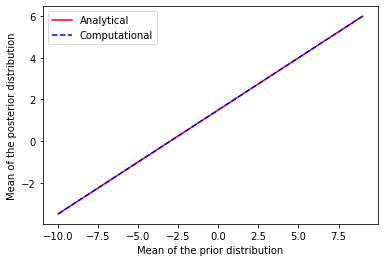

In [5]:
def compare_computational_analytical_means():

    ##########################
    ##### Your code here #####
    ##########################
    likelihood = my_gaussian(x_vector, 3, 1.5)
    mu_priors = np.arange(-10,10,1)
    
    mus_analytical = []
    mus_by_integration = []
    for mu in mu_priors:
      prior = my_gaussian(x_vector, mu, 1.5)
      posterior = compute_posterior_pointwise(prior, likelihood)

      mus_analytical.append((1.5**2 *(mu + 3))/(1.5**2 + 1.5**2))
      mus_by_integration.append(np.sum(x_vector*posterior))

    return mu_priors, mus_analytical, mus_by_integration

mu_visuals, mu_analytical, mu_computational = compare_computational_analytical_means()


#Run the lines below to test your code 
plt.plot(mu_visuals,mu_analytical,'r', label= 'Analytical')
plt.plot(mu_visuals,mu_computational,'b--', label= 'Computational')
plt.legend()
plt.xlabel('Mean of the prior distribution')
plt.ylabel('Mean of the posterior distribution')
plt.show()


*Example output:*

<img alt='Solution hint' align='left' width=413 height=300 src=https://raw.githubusercontent.com/svandergoote/LGBIO2060-2021/master/Solutions/TP3_sol2.PNG>

## Application of Bayes' theorem

Consider you are playing the final of a very important tennis tournament against a very famous tennis player, Yannick Noah. You want to perfectly estimate where the ball he just hit will land. To do this you have two sources of information: 

  1. The visual information you gathered as he hit the ball (the angle of his wirst, shoulder, the angle of attack,...)
  2. The information you gathered before the match about his game (his game stats, his current season,...)

In this exercise, we will: 
  1. Generate the likelihood for multiple possible stimulus inputs
  2. Generate a Gaussian prior for multiple possible stimulus inputs
  3. Estimate our posterior as a function of the stimulus input
  4. Estimate a participant response given the posterior
  
Typically, in an experimental setup, we know the participant response and the stimulus. We use then these information to recover the model used by the brain. 



![Generative model](https://raw.githubusercontent.com/fblondiaux/LGBIO2060-2020/master/Solutions/TP2-GenerativeModel.png)



### 1 -  Likelihood array
  
The first step is to create the likelihood distribution from the encoded stimulus. For the sake of visualization, we will create a likelihood $f(x) = p(\tilde x|x)$ for each potential encoded stimulus $\tilde x$. We will then be able to visualize the likelihood as a function of hypothesized true stimulus positions: $x$ on the x-axis and encoded position $\tilde x$ on the y-axis.

**Exercise 2.A**
We assume that the encoding of the position is on average equal to the true position, with some gaussian noise. Then, using the equation for the `my_gaussian` and the values in `hypothetical_stim`:
  
* Create a Gaussian likelihood with mean varying from `hypothetical_stim`, keeping $\sigma_{\text{likelihood}}$ constant at 1.
* Each likelihood will have a different mean and thus a different row-likelihood of your 2D array, such that you end up with a likelihood array made up of 1,000 row-Gaussians with different means. 

In other words, each entry of the output array is the probability  the probability that the brain encodes the position $\tilde x_i$ given the true position $x_j$. 

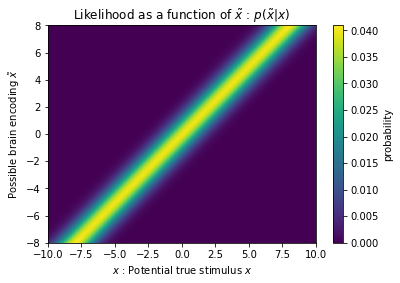

In [6]:
x = np.arange(-10, 10, 0.1)
hypothetical_stim = np.linspace(-8, 8, 1000)
sigma_likelihood = 1
likelihood_array = np.zeros((len(hypothetical_stim), len(x)))
def compute_likelihood_array(x_points, stim_array, sigma=1.):
    """
    This function computes the likelihood array of a given stimulus
    
    Inputs : x_points (numpy array) is the set of points on which one wants to evaluate the likelihood
             stim_array (numpy array) contains the mean position of every possible stimulus
             sigma (float) is the standard deviation of the gaussian distribution
             
    Outputs : likelihood array (numpy array) is a len(stim_array) x len(x_points) that contains the evaluation of 
              the likelihood for every possible stimulus on the the set x_points. Each line of this array corresponds
              to a single simulus (stim_array[i]).
    """
    #########################
    ## your code goes here ##
    #########################
    
    for idx, stim in enumerate(stim_array):
      likelihood_array[idx,:] = my_gaussian(x_points, stim, sigma_likelihood)
    return likelihood_array 



# Run the lines below to test your code
likelihood_array = compute_likelihood_array(x, hypothetical_stim)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
colormap = ax.imshow(likelihood_array, extent=[-10, 10, 8, -8])
cbar = plt.colorbar(colormap, ax=ax)
cbar.set_label('probability')
ax.invert_yaxis()
ax.set_xlabel("$x$ : Potential true stimulus $x$")
ax.set_title("Likelihood as a function of $\~x$ : $p(\~x | x)$")
ax.set_ylabel("Possible brain encoding $\~x$")
ax.set_aspect('auto')


*Example output:*

<img alt='Solution hint' align='left' width=413 height=300 src=https://raw.githubusercontent.com/svandergoote/LGBIO2060-2021/master/Solutions/TP3_sol3.PNG>

**Question : How does the likelihood distribution for a given stimulus encoding looks like?**


### 2 - Mixture-of-Gaussians Prior

The prior distribution can sometimes be more complex than a single gaussian distribution. In this exercise, we will implement a prior distribution which is a mixture of gaussian distributions. To go back to our tennis example, let us assume that your opponent sends the ball in the middle of the court 50% of the time and in the corner of the court 50% of the time. A mixture of Gaussian will combine these two information to obtain a prior distribution that integrate them both. 
We will control how the Gaussians are mixed by summing them together with a *mixing* or *weight* parameter $p_{centre}$, set to a value between 0 and 1, such that:

\begin{eqnarray}
\text{Mixture} = p_{\text{centre}} \times \mathcal{N}\left(\mu_{\text{centre}},\sigma_{\text{centre}}\right) + \left(1-p_{\text{centre}}\right) \times \mathcal{N}\left(\mu_{\text{corner}},\sigma_{\text{corner}}\right)
\end{eqnarray}

where $p_{centre}$ denotes the probability that the ball lands at the centre of the court.


For visualization reasons, we will create a prior array that has the same dimension as the likelihood array we created in the previous exercise. Since the prior does not change as a function of $\tilde x$ it will be identical for each row of the prior 2D array. 

Using the equation for the Gaussian `my_gaussian`:
* Generate a Gaussian *center* with mean 0 and standard deviation 0.5. 
* Generate another Gaussian *corner* with mean 3 and standard deviation 1
* Combine the two Gaussians (*center* + *corner*) to make a new prior by mixing the two Gaussians with mixing parameter $p_{center}$ = 0.50. 
* This will be the first row of your prior 2D array
* Now repeat this for varying brain encodings $\tilde x$. Since the prior does not depend on $\tilde x$ you can just repeat the prior for each $\tilde x$ (hint: use np.tile) that row prior to make an array of 1,000 (i.e. `hypothetical_stim.shape[0]`)  row-priors.


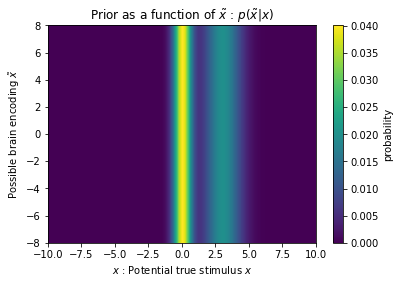

In [7]:
x = np.arange(-10, 10, 0.1)

def calculate_prior_array(x_points, stim_array, p_center,
                          mean_center=.0, sigma_center=.5,
                          mean_corner=3, sigma_corner=1):
    """
    This function computes the prior distribution based on the mixture of gaussians
    
    Inputs : x_points (numpy array) is the set of points on which we want to evaluate the prior
             stim_array (numpy array) is the array of stimulus input
             p_center (float) is the probability that the ball lands in center of the court
             mean_center (float) mean value of the center ball landing site
             mean_corner (float) mean value of the corner ball landing site 
             sigma_center (float) std deviation of the center ball landing site
             sigma_corner (float) std deviation of the corner ball landing site 
             
    Outputs : prior array (numpy array) contains the prior in a len(stim_array) x len(x_points) array
        'indep' stands for independent
    """

    ###########################
    ### your code goes here ###
    ###########################
    center = my_gaussian(x_points, mean_center, sigma_center)
    corner = my_gaussian(x_points, mean_corner, sigma_corner)
    prior = p_center * center + (1 - p_center) * corner
    prior /= np.sum(prior)
    prior_array = np.tile(prior, (len(stim_array),1))
    return prior_array


# Run the lines below to test your code



p_center = .5
hypothetical_stim = np.linspace(-8, 8, 1000)
prior_array = calculate_prior_array(x, hypothetical_stim, p_center)

fig = plt.figure()
ax = fig.add_subplot(111)
colormap = ax.imshow(prior_array, extent=[-10, 10, 8, -8])
cbar = plt.colorbar(colormap, ax=ax)
cbar.set_label('probability')
ax.invert_yaxis()
ax.set_xlabel("$x$ : Potential true stimulus $x$")
ax.set_title("Prior as a function of $\~x$ : $p(\~x|x)$")
ax.set_ylabel("Possible brain encoding $\~x$")
ax.set_aspect('auto')


*Example output:*

<img alt='Solution hint' align='left' width=413 height=300 src=https://raw.githubusercontent.com/svandergoote/LGBIO2060-2021/master/Solutions/TP3_sol4.PNG>

---
### 3 - Bayes Theorem with Complex Posteriors

We now want to compute the posterior distribution using Bayes' theorem. Since we have already created a likelihood and a prior distributions for each brain encoded position $\tilde x$, all we need to do is to multiply them row-wise. That is, each row of the posterior array will be the posterior distribution resulting from the multiplication of the prior and likelihood distributions of the same equivalent row.

Mathematically:
$$
\begin{eqnarray}
    Posterior\left[i, :\right] \propto Likelihood\left[i, :\right] \odot Prior\left[i, :\right]
\end{eqnarray}
$$
where $\odot$ represents the [Hadamard Product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) (i.e., elementwise multiplication) of the corresponding prior and likelihood row vectors `i` from each matrix.

Follow these steps to build the posterior as a function of the brain encoded stimulus $\tilde x$:
* For each row of the prior and likelihood (i.e. each possible brain encoding $\tilde x$), fill in the posterior matrix so that every row of the posterior array represents the posterior density for a different brain encode  $\tilde x$.

**Try to implement a vectorial operation to compute the posterior**

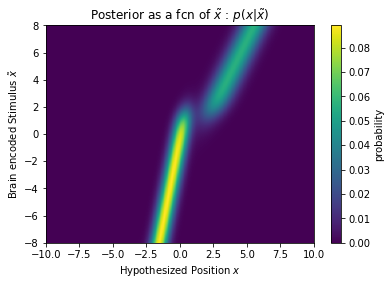

In [9]:
def calculate_posterior_array(prior_array, likelihood_array):
    """
    This function computes the posterior distribution from the prior & the likelihood
    
    Inputs : prior_array (numpy array) is the prior distribution
             likelihood_array (numpy array) is the likelihood distribution
             For both these arrays, each line correspond to a different input stimulus
    Outputs : posterior_array (numpy array) that contains the posterior distribution for the different
              input stimulus (each line corresponds to a different input)
    """

    ###########################
    ### your code goes here ###
    ###########################
    posterior_array = prior_array * likelihood_array
    posterior_array /= posterior_array.sum(axis=1, keepdims=True)  # normalize each row separately
    return posterior_array
    
#Run the lines below to test your code 
posterior_array = calculate_posterior_array(prior_array, likelihood_array)
fig = plt.figure()
ax = fig.add_subplot(111)
colormap = ax.imshow(posterior_array, extent=[-10, 10, 8, -8])
cbar = plt.colorbar(colormap, ax=ax)
cbar.set_label('probability')
ax.invert_yaxis()
ax.set_ylabel('Brain encoded Stimulus $\~x$')
ax.set_title('Posterior as a fcn of $\~x$ : $p(x | \~x)$')
ax.set_xlabel('Hypothesized Position $x$')
ax.set_aspect('auto')        


*Example output:*

<img alt='Solution hint' align='left' width=413 height=300 src=https://raw.githubusercontent.com/svandergoote/LGBIO2060-2021/master/Solutions/TP3_sol5.PNG>

---
### 4 - Estimating the position $\hat x$


Now that we have a posterior distribution (for each possible brain encoding $\tilde x$) that represents the brain's estimated ball position: $p(x|\tilde x)$, we want to make an estimate (response) of the ball location $\hat x$ using the posterior distribution. This would represent the subject's estimate if their (for us as experimentalist unobservable) brain encoding took on each possible value. 

This effectively encodes the *decision* that a participant would make for a given brain encoding $\tilde x$. In this exercise, we make the assumption that participants take the mean of the posterior (decision rule) as a response estimate for the ball location.

Using this knowledge, we will now represent $\hat x$ as a function of the encoded stimulus $\tilde x$. This will result in a 2D binary decision array. To do so, we will scan the posterior matrix (i.e. row-wise), and set the array cell value to 1 at the mean of the row-wise posterior.

**Suggestions**
* For each brain encoding $\tilde x$ (row of the posterior array), calculate the mean of the posterior, and set the corresponding cell of the binary decision array to 1. (e.g., if the mean of the posterior is at position 0, then set the cell with x_column == 0 to 1).

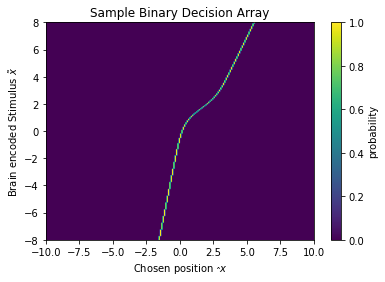

In [ ]:
def calculate_binary_decision_array(x_points, posterior_array):
    """
    This function computes the decision taken by the participants for every potential decision input
    
    Inputs : x_points (numpy array) is the set of points on which we evaluated the posterior
             posterior_array (numpy array) is the posterior distribution
             
    Outputs : binary_decision_array (numpy array) that contains the decision taken for every potential input stimulus
    """

    binary_decision_array = np.zeros_like(posterior_array)
    ###########################
    ### your code goes here ###
    ###########################
    for i in range(len(posterior_array)):
        # calculate mean of the posterior 
        mean = np.sum(x_points * posterior_array[i])
        # find the postion of mean in x_points (closest position)
        idx = np.argmin(np.abs(x_points - mean))
        binary_decision_array[i, idx] = 1

    return binary_decision_array

    
#Run the lines below to test your code
binary_decision_array = calculate_binary_decision_array(x, posterior_array)

fig = plt.figure()
ax = fig.add_subplot(111)
colormap = ax.imshow(binary_decision_array, extent=[-10, 10, 8, -8])
cbar = plt.colorbar(colormap, ax=ax)
cbar.set_label('probability')
ax.invert_yaxis()
ax.set_ylabel('Brain encoded Stimulus $\~x$')
ax.set_title('Sample Binary Decision Array')
ax.set_xlabel('Chosen position $\hat x$')
ax.set_aspect('auto')



*Example output:*

<img alt='Solution hint' align='left' width=413 height=300 src=https://raw.githubusercontent.com/svandergoote/LGBIO2060-2021/master/Solutions/TP3_sol6.PNG>

In real life experiment, we typically have the response and the stimulus. With the schema above, we can therefore recover the brain encoding given the subject response. 